In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path
from glob import glob

import sklearn
import numpy as np
import pandas as pd
from glob import glob

from keras.models import load_model

import matplotlib
import matplotlib.pyplot as plt

filepath = Path(os.getcwd())
filepath

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


PosixPath('/vol/ml/apartin/projects/LearningCurves/notebooks')

In [37]:
# Make all python scripts available in the path
import sys
sys.path.append('../')

In [16]:
rt = pd.read_csv(Path('../top6_trn/top6.lgb_reg.cvf1.GE.DD.AUC_2019-9-22_h21-m18/runtime.csv'))
rt.head()

,fold,tr_sz,time
0,0,128,0.008842
1,0,256,0.014346
2,0,512,0.032981
3,0,1024,0.124355
4,0,2048,0.139320


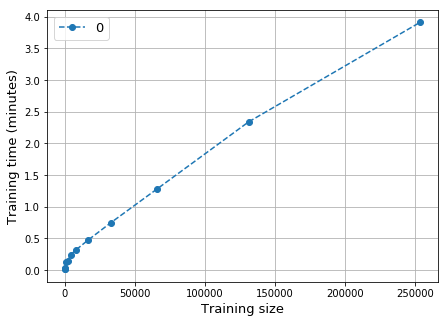

In [17]:
figsize=(7,5)
fontsize = 13
fig, ax = plt.subplots(figsize=figsize)
for f in rt['fold'].unique():
    d = rt[rt['fold']==f]
    ax.plot(d['tr_sz'], d['time'], 'o--', label=str(f))

ax.set_xlabel(f'Training size', fontsize=fontsize)
ax.set_ylabel(f'Training time (minutes)', fontsize=fontsize)

ax.legend(loc='best', frameon=True, fontsize=fontsize)
ax.grid(True)

In [35]:
# Test training plots function
from ml_models import plot_prfrm_metrics
rundir = Path('../top6_trn/top6.nn_reg_l_less.sgd.cvf1.GE.DD.AUC_2019-9-20_h20-m33')
logfile_path = rundir / 'cv1_sz253336/training.log'
hs = plot_prfrm_metrics(history=None, logfile_path=logfile_path, title=None, name=None, skp_ep=0, outdir='.', add_lr=False)

In [38]:
datadir = Path('../top6_data_splits')